In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('nba_logreg.csv')

In [3]:
data=data.fillna(0.0)

In [4]:
data=data.drop_duplicates()

In [5]:
imenjaci=data.duplicated(subset=['name','gp','min','pts'],keep=False)

In [6]:
imenjaci1=data.loc[imenjaci]
imenjaci1.index

Int64Index([  18,   19,   71,   72,   73,   74,  120,  121,  126,  127,  156,
             157,  158,  159,  162,  164,  165,  167,  168,  170,  223,  224,
             225,  226,  364,  365,  367,  368,  472,  473,  553,  554,  848,
             849,  870,  871, 1126, 1127, 1229, 1230],
           dtype='int64')

In [7]:
data.drop(index=(imenjaci1.index),inplace=True)

In [8]:
scaler=MinMaxScaler()

In [9]:
nazivi=data.columns[1:]
X=data[nazivi]

In [10]:
X

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [11]:
X = pd.DataFrame(scaler.fit_transform(X), columns=nazivi)

In [12]:
X

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0.352113,0.642857,0.243636,0.232323,0.357895,0.218437,0.217391,0.323077,0.250,0.207792,0.225490,0.699,0.132075,0.340426,0.279412,0.179245,0.16,0.102564,0.279070,0.0
1,0.338028,0.629630,0.236364,0.171717,0.310526,0.116232,0.304348,0.430769,0.235,0.337662,0.333333,0.765,0.094340,0.191489,0.154412,0.349057,0.44,0.128205,0.348837,0.0
2,0.887324,0.322751,0.163636,0.171717,0.205263,0.368737,0.173913,0.261538,0.244,0.116883,0.127451,0.670,0.094340,0.159574,0.139706,0.094340,0.20,0.076923,0.209302,0.0
3,0.661972,0.224868,0.181818,0.202020,0.247368,0.376754,0.043478,0.076923,0.226,0.116883,0.127451,0.689,0.188679,0.074468,0.117647,0.075472,0.24,0.025641,0.209302,1.0
4,0.521127,0.222222,0.138182,0.131313,0.115789,0.573146,0.000000,0.015385,0.000,0.168831,0.186275,0.674,0.188679,0.138298,0.161765,0.028302,0.12,0.102564,0.162791,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,0.971831,0.335979,0.130909,0.131313,0.147368,0.390782,0.000000,0.030769,0.143,0.155844,0.147059,0.792,0.075472,0.063830,0.066176,0.235849,0.24,0.051282,0.162791,0.0
1284,0.802817,0.251323,0.116364,0.121212,0.173684,0.240481,0.043478,0.107692,0.167,0.103896,0.098039,0.794,0.075472,0.095745,0.088235,0.216981,0.32,0.000000,0.279070,1.0
1285,0.450704,0.238095,0.170909,0.191919,0.163158,0.625251,0.000000,0.000000,0.000,0.129870,0.156863,0.643,0.283019,0.223404,0.257353,0.028302,0.12,0.102564,0.186047,0.0
1286,0.577465,0.235450,0.138182,0.141414,0.157895,0.402806,0.000000,0.030769,0.100,0.155844,0.176471,0.625,0.037736,0.021277,0.029412,0.207547,0.16,0.025641,0.162791,1.0


In [13]:
model_klaster=DBSCAN(eps=0.5,min_samples=10).fit(X)
# pred=model_klaster.fit_predict(X)

In [14]:
labels=model_klaster.labels_

In [15]:
broj_klastera = len(set(labels)) - (1 if -1 in labels else 0)
broj_outlajera = list(labels).count(-1)

In [16]:
print("Estimated number of clusters: %d" % broj_klastera)
print("Estimated number of noise points: %d" % broj_outlajera)

Estimated number of clusters: 2
Estimated number of noise points: 54


In [17]:
from sklearn.decomposition import PCA
X1=PCA(n_components=2).fit_transform(X)

In [18]:
X1.shape

(1288, 2)

In [24]:
model_klaster=DBSCAN(eps=0.5).fit(X1)
pred=model_klaster.fit_predict(X1)

In [25]:
labels=model_klaster.labels_

In [26]:
broj_klastera = len(set(labels)) - (1 if -1 in labels else 0)
broj_outlajera = list(labels).count(-1)

In [27]:
print("Estimated number of clusters: %d" % broj_klastera)
print("Estimated number of noise points: %d" % broj_outlajera)

Estimated number of clusters: 2
Estimated number of noise points: 0


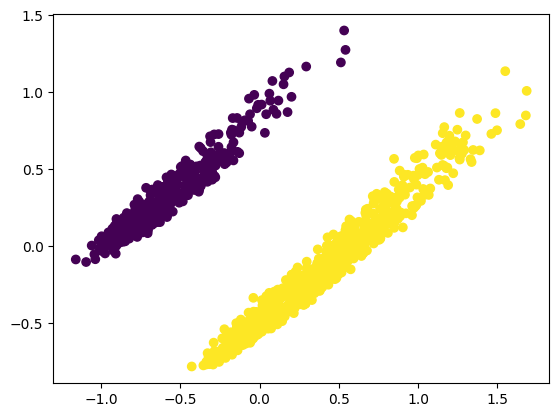

In [28]:
plt.scatter(X1[:, 0], X1[:, 1],c=pred)
plt.show()